In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/My Drive/data/archive.zip'
extract_path = '/content/drive/My Drive/data/cancer_dataset'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)



['BreaKHis 400X']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/My Drive/data/cancer_dataset/BreaKHis 400X/train'
test_data_dir = '/content/drive/My Drive/data/cancer_dataset/BreaKHis 400X/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation')


Found 919 images belonging to 2 classes.
Found 229 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25)


Epoch 1/25
28/28 [==============================] - 38s 1s/step - loss: 0.6161 - accuracy: 0.6900 - val_loss: 0.5122 - val_accuracy: 0.6786
Epoch 2/25
28/28 [==============================] - 33s 1s/step - loss: 0.5111 - accuracy: 0.7576 - val_loss: 0.4502 - val_accuracy: 0.7991
Epoch 3/25
28/28 [==============================] - 35s 1s/step - loss: 0.4702 - accuracy: 0.8196 - val_loss: 0.4091 - val_accuracy: 0.8214
Epoch 4/25
28/28 [==============================] - 29s 1s/step - loss: 0.4493 - accuracy: 0.8343 - val_loss: 0.3710 - val_accuracy: 0.8482
Epoch 5/25
28/28 [==============================] - 33s 1s/step - loss: 0.4444 - accuracy: 0.8331 - val_loss: 0.4501 - val_accuracy: 0.7946
Epoch 6/25
28/28 [==============================] - 36s 1s/step - loss: 0.4798 - accuracy: 0.7948 - val_loss: 0.3746 - val_accuracy: 0.8304
Epoch 7/25
28/28 [==============================] - 29s 1s/step - loss: 0.4319 - accuracy: 0.8410 - val_loss: 0.4689 - val_accuracy: 0.7679
Epoch 8/25
28/28 [==

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print(test_acc)


Found 545 images belonging to 2 classes.
18/18 [==============================] - 14s 789ms/step - loss: 0.4356 - accuracy: 0.8202
0.820183515548706


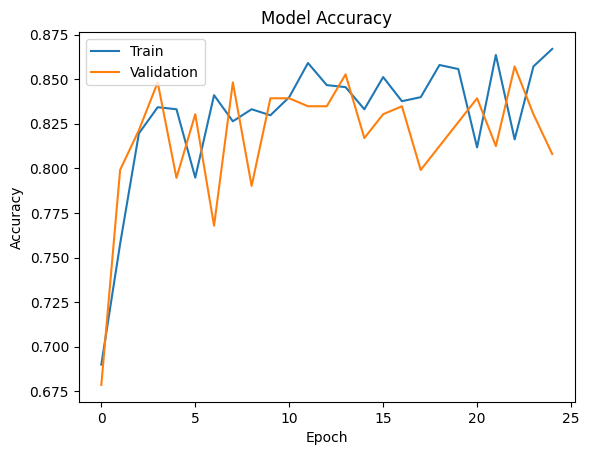

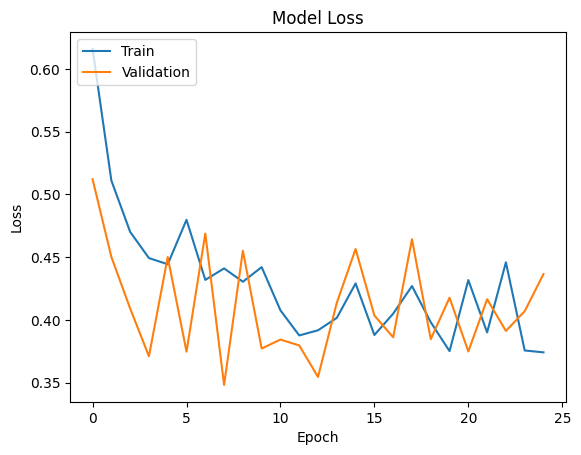

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save('cancer_classifier_model.h5')

from google.colab import files
files.download('cancer_classifier_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>